#  behavioral decoding - Final

### Sub 04 & 13

### Load data

In [1]:
import sys
sys.path.append('/home/c10370862/FEED_new/scripts/')
import behav

#set parameters
sub_labels = ['04','13']
n_sessions = 3
task = 'expressive'

#load data and create DFs
AU_dfs,emo_dfs = behav.data_prep(sub_labels,n_sessions,task)

('found the following files for sub-04: '
 "['/srv/FEED/behav_data/sub-04/sub-04_ses-1_task-expressive_run-1.tsv', "
 "'/srv/FEED/behav_data/sub-04/sub-04_ses-1_task-expressive_run-2.tsv', "
 "'/srv/FEED/behav_data/sub-04/sub-04_ses-1_task-expressive_run-3.tsv', "
 "'/srv/FEED/behav_data/sub-04/sub-04_ses-1_task-expressive_run-4.tsv', "
 "'/srv/FEED/behav_data/sub-04/sub-04_ses-2_task-expressive_run-1.tsv', "
 "'/srv/FEED/behav_data/sub-04/sub-04_ses-2_task-expressive_run-1_redo.tsv', "
 "'/srv/FEED/behav_data/sub-04/sub-04_ses-2_task-expressive_run-2.tsv', "
 "'/srv/FEED/behav_data/sub-04/sub-04_ses-2_task-expressive_run-2_redo.tsv', "
 "'/srv/FEED/behav_data/sub-04/sub-04_ses-2_task-expressive_run-3.tsv', "
 "'/srv/FEED/behav_data/sub-04/sub-04_ses-2_task-expressive_run-3_redo.tsv', "
 "'/srv/FEED/behav_data/sub-04/sub-04_ses-2_task-expressive_run-4.tsv', "
 "'/srv/FEED/behav_data/sub-04/sub-04_ses-2_task-expressive_run-4_redo.tsv', "
 "'/srv/FEED/behav_data/sub-04/sub-04_ses-3_task-

In [2]:
for df in emo_dfs:
    print(df.rating_category.value_counts())

Blij          159
Walging       153
Boos          127
Verrassing     98
Bang           85
Verdrietig     66
Name: rating_category, dtype: int64
Blij          133
Boos           92
Walging        67
Verrassing     61
Bang           60
Verdrietig     48
Name: rating_category, dtype: int64


In [311]:
import numpy as np

avg_trials = np.mean([len(AU_dfs[0]),len(AU_dfs[1])])
std_trials = np.std([len(AU_dfs[0]),len(AU_dfs[1])])
print(avg_trials, std_trials)

574.5 113.5


In [ ]:
np.std([len(AU_dfs[0]),len(AU_dfs[1])])

### Train-test data split

In [316]:
from sklearn.model_selection import train_test_split

X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []
data = zip(AU_dfs, emo_dfs, sub_labels)
for AU, emo, sub in data:
    X = AU.values
    y = emo.rating_category
    X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, stratify = y)
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)
    n_trials_test = X_test.shape[0]
    print('test size for sub-%s: %i' %(sub, n_trials_test))
    

test size for sub-04: 138
test size for sub-13: 93


In [60]:
n_test_avg = np.mean([X_test_list[0].shape[0],X_test_list[1].shape[0]])
print('average test set size', n_test_avg)

average test set size 115.5


In [68]:
from pathlib import Path
import os
import os.path as op
file_path = op.join(str(Path('.').absolute().parent),'files/dec_files')
if not op.exists(file_path):
    os.makedirs(file_path)
for i, sub in enumerate(sub_labels):
    np.savetxt(op.join(file_path, 'behav_X_train_sub-{}'.format(sub)),X_train_list[i], delimiter='\t')
    np.savetxt(op.join(file_path, 'behav_X_test_sub-{}'.format(sub)),X_test_list[i], delimiter='\t')
    y_train_list[i].to_csv(op.join(file_path, 'behav_y_train_sub-{}'.format(sub)),sep = '\t')
    y_test_list[i].to_csv(op.join(file_path, 'behav_y_test_sub-{}'.format(sub)),sep = '\t')                    

In [133]:
X_train_list = []
for sub in sub_labels:
    X_train_list.append(pd.read_csv(op.join(file_path, 'behav_X_train_sub-{}'.format(sub)), sep = '\t', header = None).values)

### Find best model within training data

In [317]:
from sklearn.svm import LinearSVC

In [51]:
auc_long_list = []
clf = LinearSVC()
data = zip(X_train_list, y_train_list, sub_labels)
print('calculating model performance for model with parameters: %s' %(clf.get_params()))
for X, y, sub in data:
    AUC_df = behav.auc_validation_calc(X, y, sub, clf)
    auc_long_list.append(behav.create_long_df(AUC_df))
    
#behav_analysis.plot_auc_score(auc_long_list)


calculating model performance for model with parameters: {'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}
mean AUC score sub-04: 0.605919
mean AUC score sub-13: 0.704035


In [52]:
auc_long_list = []

clf_2 = LinearSVC(dual = False, 
                  class_weight = 'balanced')

data = zip(X_train_list, y_train_list, sub_labels)
print('calculating model performance for model with parameters: %s' %(clf_2.get_params()))
for X, y, sub in data:
    AUC_df = behav.auc_validation_calc(X, y, sub, clf_2)
    auc_long_list.append(behav.create_long_df(AUC_df))
    
#behav_analysis.plot_auc_score(auc_long_list)

calculating model performance for model with parameters: {'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}
mean AUC score sub-04: 0.625911
mean AUC score sub-13: 0.711867


In [53]:
cvals = [0.01,0.1,0.25,0.5,0.75,1, 10, 100, 500, 1000]
for c_val in cvals:
    clf = LinearSVC(penalty = 'l2',
                    dual=False,
                    class_weight='balanced',
                    C=c_val)
    auc_long_list = []
    data = zip(X_train_list, y_train_list, sub_labels)
    print('calculating model performance for model with parameters: %s' %(clf.get_params()))
    for X, y, sub in data:
        AUC_df = behav.auc_validation_calc(X, y, sub,clf)
        auc_long_list.append(behav.create_long_df(AUC_df))
    

calculating model performance for model with parameters: {'C': 0.01, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}
mean AUC score sub-04: 0.614430
mean AUC score sub-13: 0.706957
calculating model performance for model with parameters: {'C': 0.1, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}
mean AUC score sub-04: 0.625980
mean AUC score sub-13: 0.709334
calculating model performance for model with parameters: {'C': 0.25, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 

In [54]:
cvals = [0.01,0.1,0.25,0.5,0.75,1, 10, 100, 500,1000,10000]
for c_val in cvals:
    clf = LinearSVC(penalty = 'l1',
                    dual=False,
                    class_weight='balanced',
                    C=c_val)
    auc_long_list = []
    data = zip(X_train_list, y_train_list, sub_labels)
    print('calculating model performance for model with parameters: %s' %(clf.get_params()))
    for X, y, sub in data:
        AUC_df = behav.auc_validation_calc(X, y, sub,clf)
        auc_long_list.append(behav.create_long_df(AUC_df))
    
    #behav_analysis.plot_auc_score(auc_long_list)

calculating model performance for model with parameters: {'C': 0.01, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': None, 'tol': 0.0001, 'verbose': 0}
mean AUC score sub-04: 0.500000
mean AUC score sub-13: 0.500000
calculating model performance for model with parameters: {'C': 0.1, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': None, 'tol': 0.0001, 'verbose': 0}
mean AUC score sub-04: 0.618698
mean AUC score sub-13: 0.711327
calculating model performance for model with parameters: {'C': 0.25, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': None, 'tol': 0.0001, 'verbose': 

In [55]:
from sklearn.svm import SVC

In [56]:
cvals = [0.01,0.1,0.25,0.5,0.75,1, 10, 100, 500,1000,10000]
for c_val in cvals:
    clf = SVC(kernel = 'linear',
              class_weight='balanced',
              C=c_val)
    auc_long_list = []
    data = zip(X_train_list, y_train_list, sub_labels)
    print('calculating model performance for model with parameters: %s' %(clf.get_params()))
    for X, y, sub in data:
        AUC_df = behav.auc_validation_calc(X, y, sub,clf)
        auc_long_list.append(behav.create_long_df(AUC_df))

calculating model performance for model with parameters: {'C': 0.01, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
mean AUC score sub-04: 0.500866
mean AUC score sub-13: 0.500000
calculating model performance for model with parameters: {'C': 0.1, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
mean AUC score sub-04: 0.617398
mean AUC score sub-13: 0.698678
calculating model performance for model with parameters: {'C': 0.25, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecate

calculating model performance for model with parameters: {'C': 100, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l1', 'random_state': None, 'tol': 0.0001, 'verbose': 0}
mean AUC score sub-04: 0.622394
mean AUC score sub-13: 0.720203


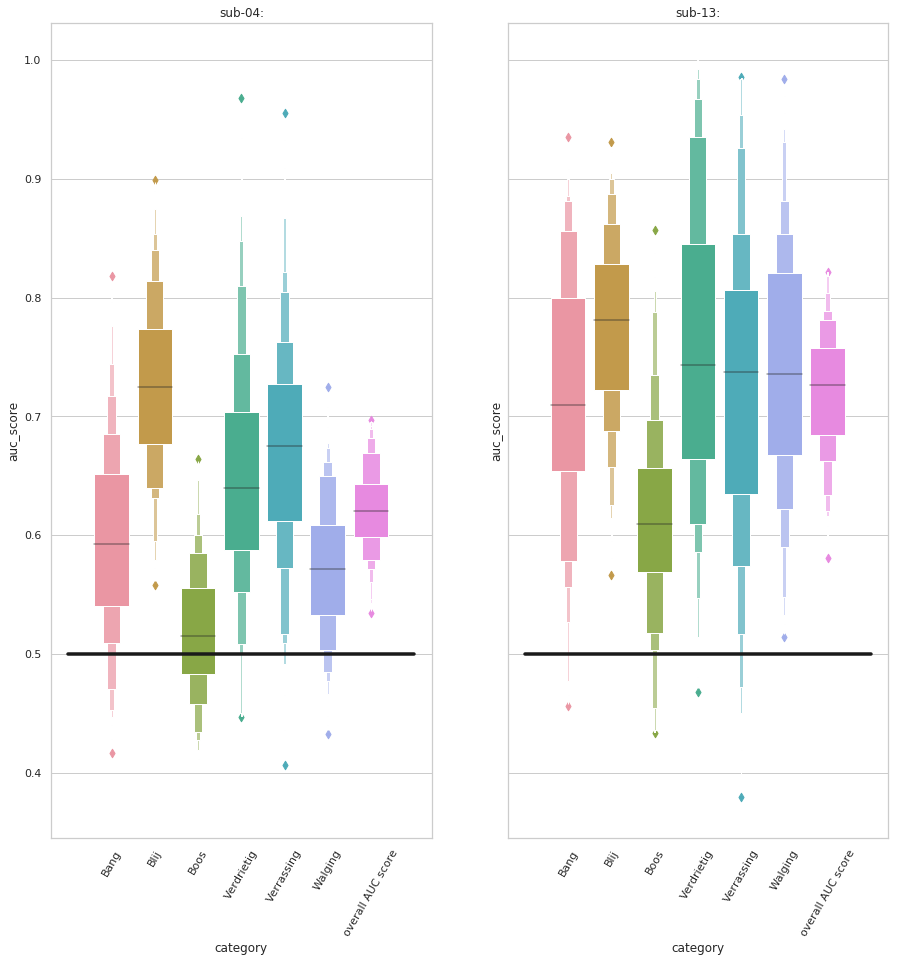

In [21]:
clf = LinearSVC(penalty = 'l1',
                    dual=False,
                    class_weight='balanced',
                    C=100)
auc_long_list = []
data = zip(X_train_list, y_train_list, sub_labels)
print('calculating model performance for model with parameters: %s' %(clf.get_params()))
for X, y, sub in data:
    AUC_df = behav.auc_validation_calc(X, y, sub,clf)
    auc_long_list.append(behav.create_long_df(AUC_df))
behav.plot_auc_score(auc_long_list,sub_labels)

### Final Cross validation

In [9]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)

In [10]:
data = zip(X_train_list, X_test_list, y_train_list, y_test_list)
#do i need a new ohe? could also return it from function above?
ohe = OneHotEncoder(sparse=False)
auc_long_final = []
auc_df_final = []

clf = LinearSVC(penalty = 'l1',
                dual=False,
                class_weight='balanced',
                C=100)

for X_train, X_test, y_train, y_test in data:
    
    names = sorted(y_train.unique())
    auc_dict = {key:[] for key in names}
    y_train = y_train.values[:,np.newaxis]
    y_test = y_test.values[:,np.newaxis]
    
    ohe.fit_transform(y_train)
    
    y_train_star = ohe.transform(y_train)
    y_test_star = ohe.transform(y_test)
    
    clf.fit(X_train, y_train.ravel())
    y_hat = clf.predict(X_test)
    y_hat_star = ohe.transform(y_hat[:,np.newaxis])
    auc_score = roc_auc_score(y_test_star,y_hat_star)

    for i, key in enumerate(names):
        auc_dict[key].append(roc_auc_score(y_test_star[:,i],y_hat_star[:,i]))

    auc_df_final = pd.DataFrame(data=auc_dict)
    auc_df_final['overall AUC score'] = auc_score
    print(auc_score)
    
    auc_long_final.append(behav.create_long_df(auc_df_final))

0.6234514098582867
0.6952508938496749


In [315]:
avg_AUC = np.mean([0.6234514098582867,0.6952508938496749])
std_AUC = np.std([0.6234514098582867,0.6952508938496749])
print(avg_AUC,std_AUC)

0.6593511518539807 0.03589974199569407


In [12]:
for i, (table, sub) in enumerate(zip(auc_long_final, sub_labels)):
    table['subject'] = sub
    auc_long_final[i] = table
auc_long_final = pd.concat(auc_long_final)
auc_long_final

,category,auc_score,subject
0,Bang,0.576325,04
1,Blij,0.757370,04
2,Boos,0.542478,04
3,Verdrietig,0.662769,04
4,Verrassing,0.619915,04
5,Walging,0.581851,04
6,overall AUC score,0.623451,04
0,Bang,0.671296,13
1,Blij,0.697811,13
2,Boos,0.597795,13


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

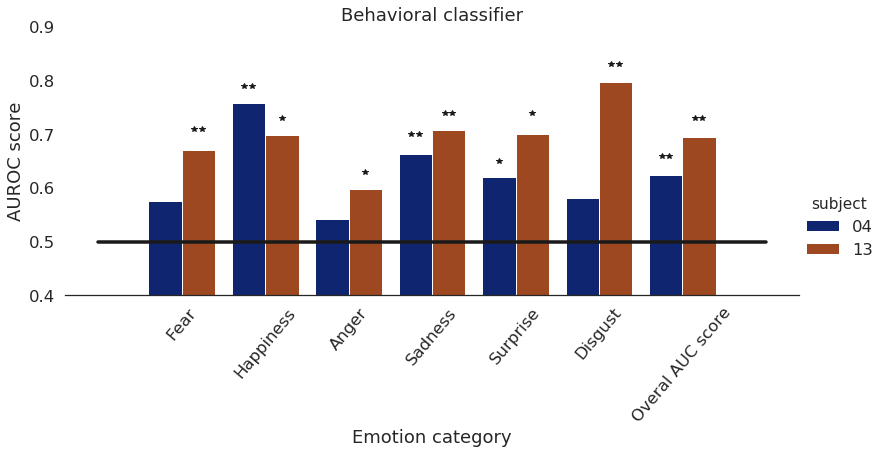

In [310]:
X_labels = ['Fear', 'Happiness', 'Anger', 'Sadness', 'Surprise', 'Disgust', 'Overal AUC score']

sns.set(palette='dark', style='white', font_scale=1.5)

g = sns.catplot(x = 'category',y = 'auc_score', 
                hue = 'subject', kind = 'bar', 
                data = auc_long_final, aspect = 2.3,
               )
g.despine(left = True)

for item in g.ax.get_xticklabels():
    item.set_rotation(50)
    
g.ax.set_title('Behavioral classifier')
g.ax.set_ylabel('AUROC score')
g.ax.set_xlabel('Emotion category')
g.ax.set_ylim((0.4,0.9))
g.ax.set_xticklabels(X_labels)

g.ax.plot([-1,7],[0.5,0.5],'k',linewidth = 3.5)
g.ax.plot([.15,0.24,0.75,0.84,1.2,2.2,2.75,2.84,3.15,3.24,3.8,4.2,5.15,5.24,5.75,5.84,6.15,6.24],
          [0.71,0.71,0.79,0.79,0.73,0.63,0.7,0.7,0.74,0.74,0.65,0.74,0.83,0.83,0.66,0.66,0.73,0.73]
          ,'*',c = 'k', ms = 6)

plt.show()

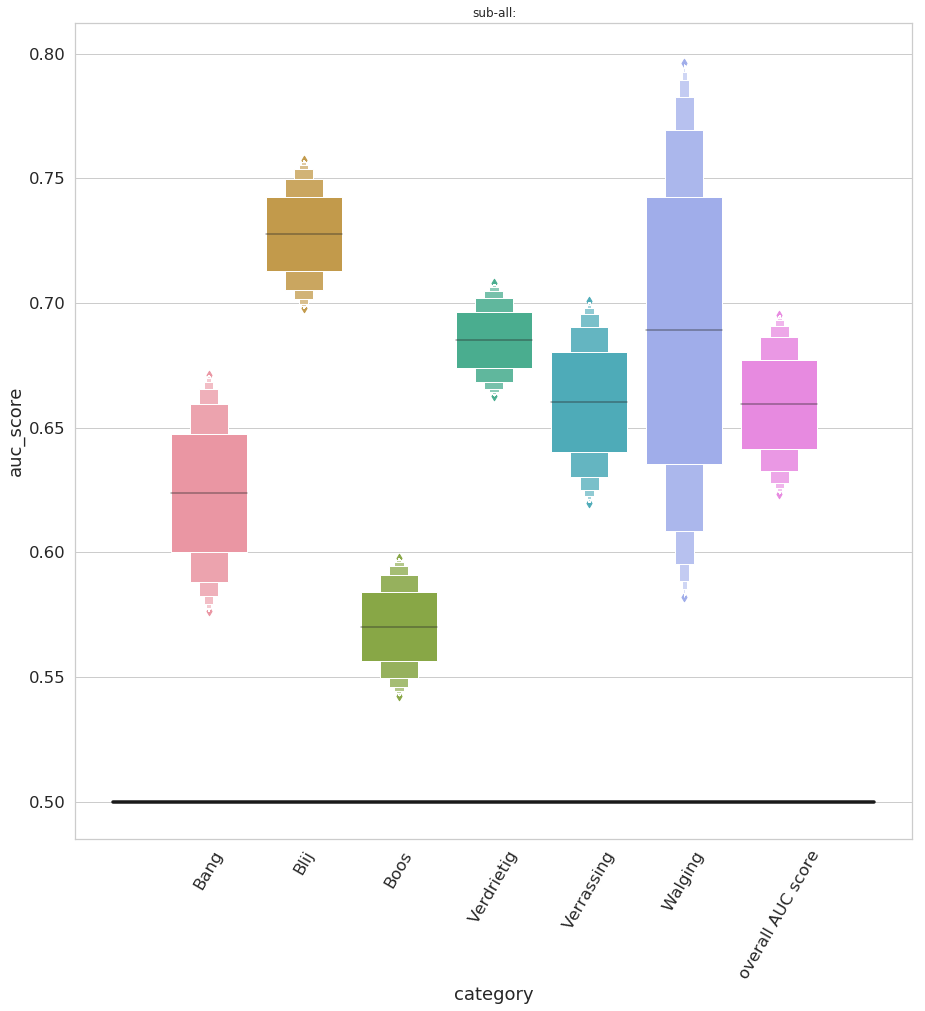

In [69]:
behav.plot_auc_score([auc_long_final], ['all'])

#### permutation

In [142]:
clf = LinearSVC(penalty = 'l1',
                dual=False,
                class_weight='balanced',
                C=100)
n_perm = 1000
auc_scores_all = []
data = zip(X_train_list, X_test_list,y_train_list, y_test_list)

for X_train, X_test, y_train, y_test in data:
    names = sorted(y_train.unique())
    y_train = y_train.values[:,np.newaxis]
    y_train_star = ohe.fit_transform(y_train)
    y_test = y_test.values[:,np.newaxis]
    y_test_star = ohe.transform(y_test)
    auc_scores = np.zeros((n_perm,7))
    
    for perm in range(n_perm):
        if isinstance(perm/50, int):
            print('permutation ', perm)
        np.random.shuffle(X_train)
        auc_dict = {key:[] for key in names}
        clf.fit(X_train, y_train.ravel())
        y_hat_star = ohe.transform(clf.predict(X_test)[:,np.newaxis])
        auc_score = roc_auc_score(y_test_star,y_hat_star)
        for i, key in enumerate(names):
            auc_dict[key].append(roc_auc_score(y_test_star[:,i],y_hat_star[:,i]))

        auc_df = pd.DataFrame(data=auc_dict)
        auc_df['overall AUC score'] = auc_score
        auc_scores[perm,:] = auc_df.values
    auc_scores_all.append(auc_scores)
    

In [164]:
auc_df_04 = auc_long_final[auc_long_final.subject == '04']
auc_df_13 = auc_long_final[auc_long_final.subject == '13']
auc_lists = [auc_df_04, auc_df_13]

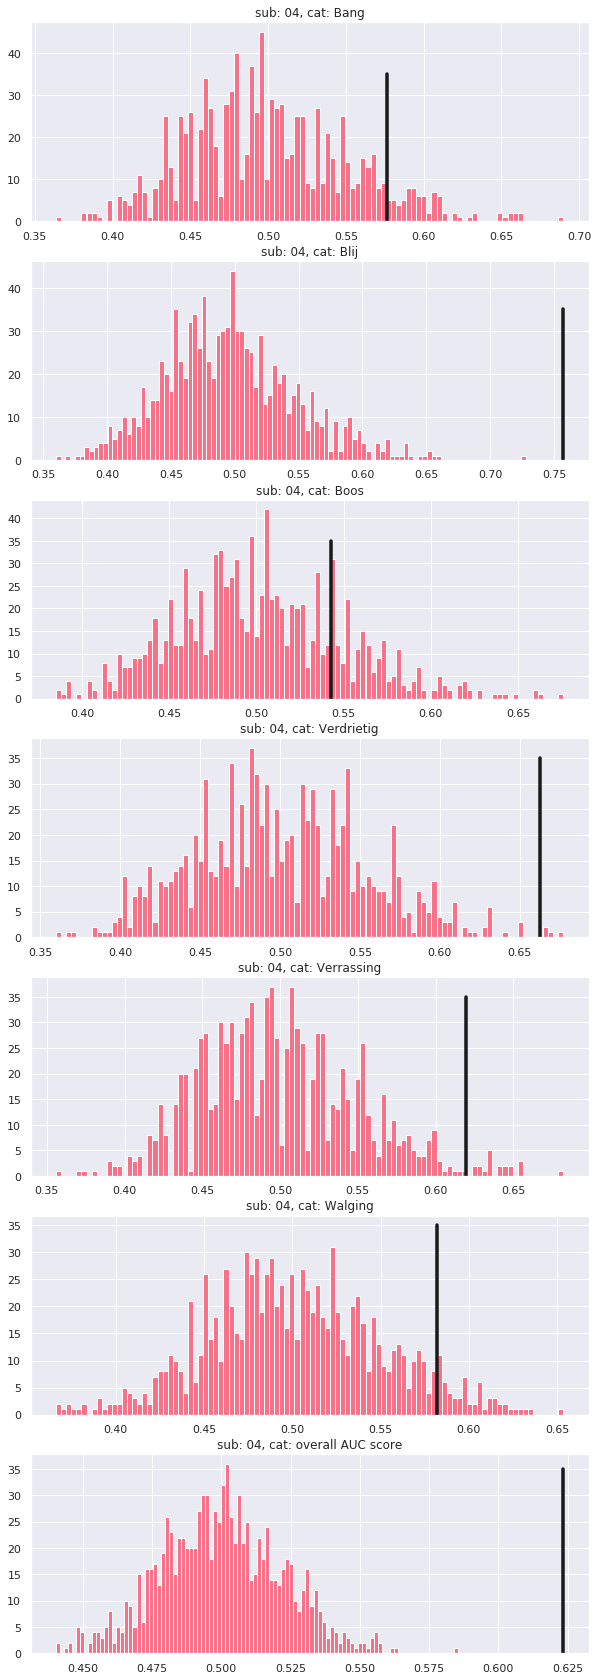

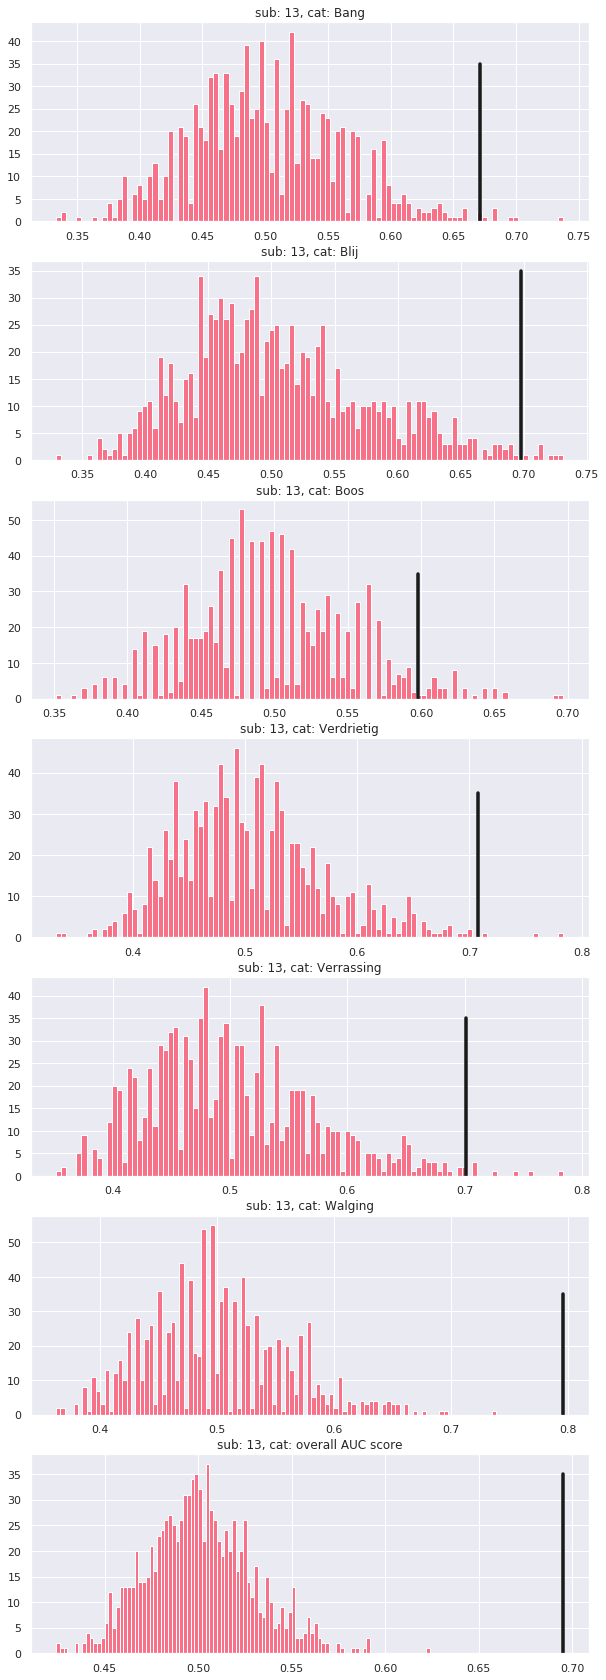

In [199]:
for permscores, auc_list in zip(auc_scores_all,auc_lists):
    fig, ax = plt.subplots(nrows=7,ncols=1, figsize = (10,30))
    for i, cat in enumerate(permscores.T):
        ax[i].hist(cat, bins = 100)
        ax[i].set_title('sub: %s, cat: %s' %(auc_list.loc[i,'subject'],auc_df.columns[i]))
        ax[i].plot([auc_list.loc[i,'auc_score'], auc_list.loc[i,'auc_score']], [0,35],'k',linewidth = 3.5)

In [216]:
for permscores, auc_list in zip(auc_scores_all,auc_lists):
    for i, cat in enumerate(permscores.T):
        pval = (np.sum(auc_list.loc[i, 'auc_score'] <= cat ) +1)/(cat.shape[0]+1)
        print('permuted P-val for subject %s, category: %s = %.3f' %(auc_list.loc[i,'subject'],auc_df.columns[i],pval))

permuted P-val for subject 04, category: Bang = 0.081
permuted P-val for subject 04, category: Blij = 0.001
permuted P-val for subject 04, category: Boos = 0.212
permuted P-val for subject 04, category: Verdrietig = 0.005
permuted P-val for subject 04, category: Verrassing = 0.022
permuted P-val for subject 04, category: Walging = 0.062
permuted P-val for subject 04, category: overall AUC score = 0.001
permuted P-val for subject 13, category: Bang = 0.010
permuted P-val for subject 13, category: Blij = 0.009
permuted P-val for subject 13, category: Boos = 0.040
permuted P-val for subject 13, category: Verdrietig = 0.004
permuted P-val for subject 13, category: Verrassing = 0.008
permuted P-val for subject 13, category: Walging = 0.001
permuted P-val for subject 13, category: overall AUC score = 0.001
